# import

# New Section

In [0]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Data preprocessing

## Data loading

In [0]:
# Load data from csv file "binary_data.csv"
# No headers
data = pd.read_csv("binary_data.csv",header=None)
data

,0,1,2
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0
...,...,...,...
95,83.489163,48.380286,1.0
96,42.261701,87.103851,1.0
97,99.315009,68.775409,1.0
98,55.340018,64.931938,1.0


## Handle missing values

In [0]:
# isnull will create a new data frame
# if the entry is nan, it would put True
# otherwise it would put False
data.isnull()

,0,1,2
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
95,False,False,False
96,False,False,False
97,False,False,False
98,False,False,False


In [0]:
# It sums up the number of True on each column
data.isnull().sum()

0    1
1    2
2    3
dtype: int64

In [0]:
# We want to drop those rows where some entries are nan
data=data.dropna(axis=0)
# Check if they are dropped
data.isnull().sum()

0    0
1    0
2    0
dtype: int64

## Data Visulaization

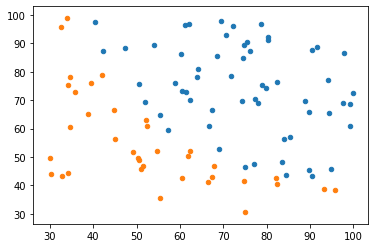

In [0]:
# The first two columns are X
# The last column is y

X = data.iloc[:, :2]
y = data.iloc[:, -1]



# ones: We want to get all the rows where y=1
# zeros: We want to get all the rows where y=0
ones = data.loc[y == 1]
zeros = data.loc[y == 0]
# Use different color to visualize scatter plot
plt.scatter(ones[0], ones[1], s=20)
plt.scatter(zeros[0], zeros[1], s=20)

## Train Validation spliting

In [0]:
from sklearn.model_selection import train_test_split
# split the train and validation set randomly in ratio 9:1
train, validation = train_test_split(data,test_size=0.1)

##Data transformation

In [0]:
def data_transform(data):
  # Transform the data format to the format that model accepts
  # data frame -> numpy array
  X, y = data.iloc[:, :-1], data.iloc[:, -1]
  X = np.array(X)
  y = np.array(y).reshape(-1,1)
  return X, y

X_train, y_train = data_transform(train)
X_val, y_val = data_transform(validation)

##Gaussian noise

In [0]:
# initializa a Gaussian noise of mean 0, standard deviation 10
noise = np.random.normal(loc=0,scale=10,size=X_train.shape)
X_train_noisy = X_train + noise

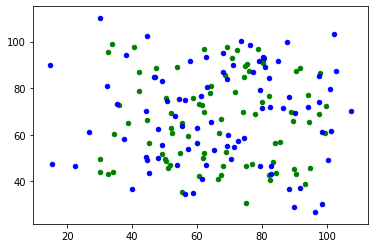

In [0]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=20, color='g')
plt.scatter(X_train_noisy[:,0], X_train_noisy[:,1], s=20, color='b')


# Model Architecture

In [0]:
class YourLogisticRegression:
    def __init__(self, learning_rate=0.001, epochs=500000):
      # initialize model parameters, hyperparameters and other variables
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.train_costs = []
      self.val_costs = []
    
    def sigmoid(self, x):
      # Implemente the function of sigmoid
      return 1/(1+np.exp(-x))

    def cost(self, h, y):
      # Implemente the cost function
      return (-1/y.shape[0])*np.sum(np.dot(y,np.log(h))+np.dot((1-y),np.log(1-h)))
    
    def fit(self, X, y, X_val, y_val):
      # concat x_0=1 in X for the bias term
      # X = [1, X]
      X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
      y = y.flatten()
      X_val = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1)
      y_val = y_val.flatten()
      
      # weights including w,b, are initialized
      # weights = [b, w1, w2]
      self.weights = np.zeros(X.shape[1])
      
      cost_lst = []
      for i in range(self.epochs):
        y_pred = self.sigmoid(np.dot(X, self.weights))
        # compute the gradient with respect to weights
        gradient = np.dot(X.T,y_pred-y)
        self.weights -= self.learning_rate * gradient/X.shape[0]
        
        cost = self.cost(y_pred, y)
        cost_lst.append([i,cost])

        if i % 100000 == 0:
          # compute cost for validation set
          y_val_pred = self.sigmoid(np.dot(X_val, self.weights))
          val_cost = self.cost(y_val_pred, y_val)
          self.val_costs.append([i, val_cost])

          print('Epoch', i, ': train cost is', cost, ', validation cost is', val_cost)

      self.train_costs = cost_lst
      self.coef_ = self.weights[1:].reshape(1,-1)
      self.intercept_ = self.weights[0].reshape(1,-1)

    def predict(self, X):
      X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
      pred = self.sigmoid(np.dot(X, self.weights))
      return pred.round()

#Model Training

## Scikit learn model

In [0]:
# Using scikit-learn to train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Print the accuracy of the model
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train.flatten(), y_pred)
print('The accuracy on training set is {}'.format(accuracy))


The accuracy on training set is 0.9047619047619048


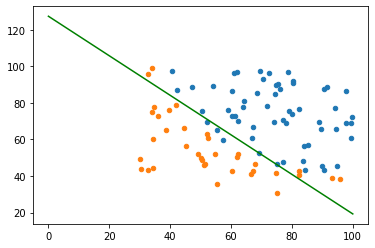

In [0]:
# Decision boundary
# y = w1 x1 + w2 x2 + b
# coef_ = [[w1, w2]]
# intercept_ = [b]
plt.scatter(ones.iloc[:, 0], ones.iloc[:, 1], s=20)
plt.scatter(zeros.iloc[:, 0], zeros.iloc[:, 1], s=20)
xx = np.linspace(0,100)
yy = (-model.coef_[0][0]/model.coef_[0][1]) * xx - model.intercept_[0] / model.coef_[0][1]
plt.plot(xx, yy, color='g')

## logistic regression model

In [0]:
# Train your own model
your_model = YourLogisticRegression()
your_model.fit(X_train, y_train, X_val, y_val)

Epoch 0 : train cost is 0.6931471805599453 , validation cost is 0.950901742828576
Epoch 100000 : train cost is 0.3796757244800018 , validation cost is 0.4974227084112583
Epoch 200000 : train cost is 0.3113128622548553 , validation cost is 0.4235489911322713
Epoch 300000 : train cost is 0.2791683271354303 , validation cost is 0.3891830883504763
Epoch 400000 : train cost is 0.2603285243198026 , validation cost is 0.3700320694288297


In [0]:
y_pred = your_model.predict(X_train)
accuracy = accuracy_score(y_train.flatten(), y_pred)
print('The accuracy on training set is {}'.format(accuracy))

The accuracy on training set is 0.9166666666666666


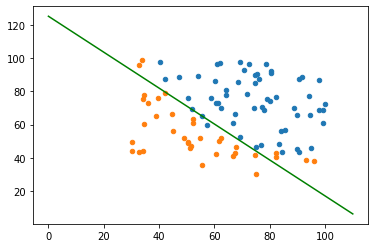

In [0]:
# Decision boundary
# Copy your implementation above
plt.scatter(ones.iloc[:, 0], ones.iloc[:, 1], s=20)
plt.scatter(zeros.iloc[:, 0], zeros.iloc[:, 1], s=20)
xx = np.linspace(0,110)
yy = (-your_model.coef_[0][0]/your_model.coef_[0][1]) * xx - your_model.intercept_[0] / your_model.coef_[0][1]
plt.plot(xx, yy, color='g')

## logistic regression model with gaussian noise

In [0]:
# Train your own model with Gaussian noise
your_model_noisy = YourLogisticRegression()
your_model_noisy.fit(X_train_noisy, y_train, X_val, y_val)
y_pred = your_model_noisy.predict(X_train)
accuracy = accuracy_score(y_train.flatten(), y_pred)
print('The accuracy on training set is {}'.format(accuracy))

Epoch 0 : train cost is 0.6931471805599453 , validation cost is 0.9570918574363241
Epoch 100000 : train cost is 0.42890584444471913 , validation cost is 0.4995583182046053
Epoch 200000 : train cost is 0.3877873875983135 , validation cost is 0.42684244620875084
Epoch 300000 : train cost is 0.372444528684041 , validation cost is 0.39171381485553125
Epoch 400000 : train cost is 0.3652145944338755 , validation cost is 0.3712617764901184
The accuracy on training set is 0.9047619047619048


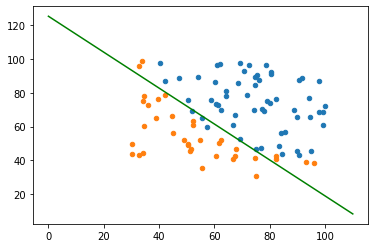

In [0]:
plt.scatter(ones.iloc[:, 0], ones.iloc[:, 1], s=20)
plt.scatter(zeros.iloc[:, 0], zeros.iloc[:, 1], s=20)
xx = np.linspace(0,110)
yy = (-your_model_noisy.coef_[0][0]/your_model_noisy.coef_[0][1]) * xx - your_model_noisy.intercept_[0] / your_model_noisy.coef_[0][1]
plt.plot(xx, yy, color='g')

#Model evaluation

## Train and Validation cost

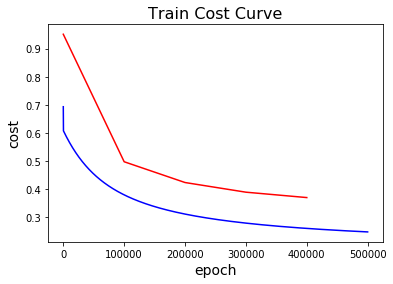

In [0]:
# Visualize the cost of training set and testing set
# Use the model without Gaussian noise
plt.plot(np.array(your_model.train_costs)[:,0],np.array(your_model.train_costs)[:,1], color='b')
plt.plot(np.array(your_model.val_costs)[:,0],np.array(your_model.val_costs)[:,1], color='r')
plt.title('Train Cost Curve', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('cost', fontsize=14)

plt.show()

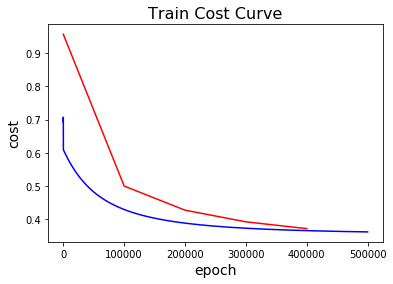

In [0]:
# Visualize the cost of training set and testing set
# Use the model with Gaussian noise
plt.plot(np.array(your_model_noisy.train_costs)[:,0],np.array(your_model_noisy.train_costs)[:,1], color='b')
plt.plot(np.array(your_model_noisy.val_costs)[:,0],np.array(your_model_noisy.val_costs)[:,1], color='r')
plt.title('Train Cost Curve', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('cost', fontsize=14)

plt.show()